In [2]:
import tensorflow as tf
import keras
import pandas
import sklearn
import matplotlib
import pandas as pd



In [3]:
df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [5]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [6]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [10]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])


In [11]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.4843 - val_loss: 0.6684 - val_accuracy: 0.5708
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.4912 - val_loss: 0.6647 - val_accuracy: 0.5753
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5049 - val_loss: 0.6609 - val_accuracy: 0.6027
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.5656 - val_loss: 0.6563 - val_accuracy: 0.6575
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.5998 - val_loss: 0.6515 - val_accuracy: 0.7169
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.7016 - val_loss: 0.6457 - val_accuracy: 0.7580
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.7270 - val_loss: 0.6397 - val_accuracy: 0.8037
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.8708 - val_loss: 0.2880 - val_accuracy: 0.8995
Epoch 60/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3177 - accuracy: 0.8679 - val_loss: 0.2822 - val_accuracy: 0.8995
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.8699 - val_loss: 0.2839 - val_accuracy: 0.8995
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8708 - val_loss: 0.2827 - val_accuracy: 0.8995
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8708 - val_loss: 0.2796 - val_accuracy: 0.8995
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8699 - val_loss: 0.2779 - val_accuracy: 0.8950
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3104 - accuracy: 0.8718 - val_loss: 0.2826 - val_accuracy: 0.9087
Epoch 

In [13]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 906us/step - loss: 0.2925 - accuracy: 0.8950


0.8949771523475647

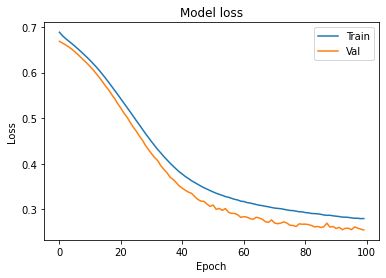

In [14]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

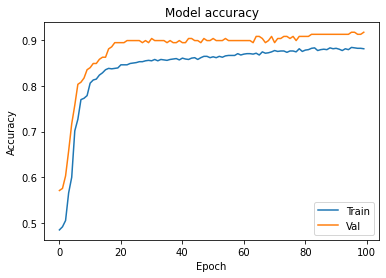

In [15]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

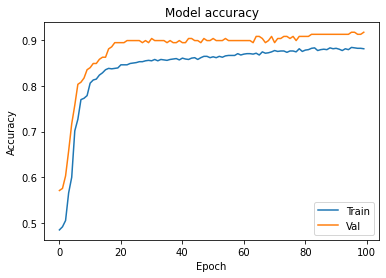

In [16]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

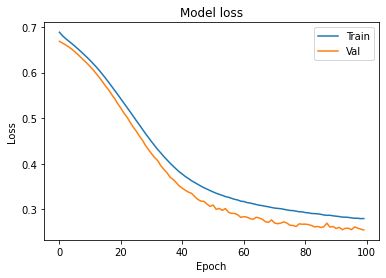

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

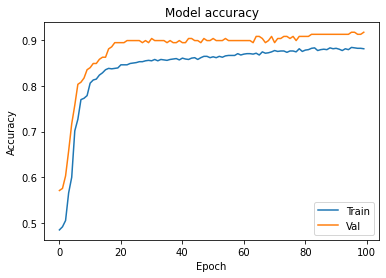

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [21]:
from keras.layers import Dropout
from keras import regularizers

In [22]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [23]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 31ms/step - loss: 14.2427 - accuracy: 0.5871 - val_loss: 3.9289 - val_accuracy: 0.8584
Epoch 2/100
32/32 [==============================] - 1s 28ms/step - loss: 1.6811 - accuracy: 0.8190 - val_loss: 0.6265 - val_accuracy: 0.8950
Epoch 3/100
32/32 [==============================] - 1s 25ms/step - loss: 0.5647 - accuracy: 0.8571 - val_loss: 0.4468 - val_accuracy: 0.9087
Epoch 4/100
32/32 [==============================] - 1s 27ms/step - loss: 0.5082 - accuracy: 0.8562 - val_loss: 0.4792 - val_accuracy: 0.8584
Epoch 5/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4849 - accuracy: 0.8699 - val_loss: 0.4189 - val_accuracy: 0.8995
Epoch 6/100
32/32 [==============================] - 1s 25ms/step - loss: 0.4699 - accuracy: 0.8777 - val_loss: 0.5128 - val_accuracy: 0.8539
Epoch 7/100
32/32 [==============================] - 1s 25ms/step - loss: 0.4874 - accuracy: 0.8777 - val_loss: 0.4794 - val_accuracy: 0.8813
Epoch

32/32 [==============================] - 1s 28ms/step - loss: 0.4330 - accuracy: 0.8757 - val_loss: 0.4032 - val_accuracy: 0.8995
Epoch 59/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4495 - accuracy: 0.8767 - val_loss: 0.4018 - val_accuracy: 0.8995
Epoch 60/100
32/32 [==============================] - 1s 25ms/step - loss: 0.4693 - accuracy: 0.8601 - val_loss: 0.4281 - val_accuracy: 0.8767
Epoch 61/100
32/32 [==============================] - 1s 27ms/step - loss: 0.4511 - accuracy: 0.8845 - val_loss: 0.4181 - val_accuracy: 0.9087
Epoch 62/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4225 - accuracy: 0.8826 - val_loss: 0.4449 - val_accuracy: 0.8858
Epoch 63/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4346 - accuracy: 0.8826 - val_loss: 0.4041 - val_accuracy: 0.9041
Epoch 64/100
32/32 [==============================] - 1s 32ms/step - loss: 0.4511 - accuracy: 0.8728 - val_loss: 0.4086 - val_accuracy: 0.8995
Epoch 65/100

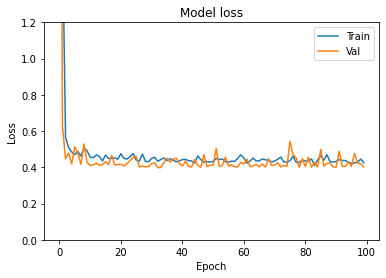

In [25]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

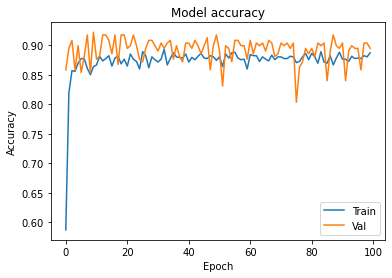

In [26]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()